In [3]:
import numpy as np
import matplotlib.pyplot as plt

In [4]:
path = '/content/drive/MyDrive/DLFS5/CH03/height_weight.txt'
xs = np.loadtxt(path)

print(xs.shape)

(25000, 2)


In [7]:
# Maximum Likelihod Estimation (MLE)
mu = np.mean(xs, axis=0)
cov = np.cov(xs, rowvar=False)

In [9]:
def multivariate_normal(x, mu, cov):
  det = np.linalg.det(cov)
  inv = np.linalg.inv(cov)
  D = len(x)
  z = 1 / np.sqrt((2 * np.pi) ** D * det)
  y = z * np.exp((x - mu).T @ inv @ (x - mu) / -2.0)
  return y

In [10]:
small_xs = xs[:500]
X, Y = np.meshgrid(np.arange(150, 195, 0.5), np.arange(45, 75, 0.5))
Z = np.zeros_like(X)

In [11]:
for i in range(X.shape[0]):
  for j in range(X.shape[1]):
    x = np.array([X[i, j], Y[i, j]])
    Z[i, j] = multivariate_normal(x, mu, cov)

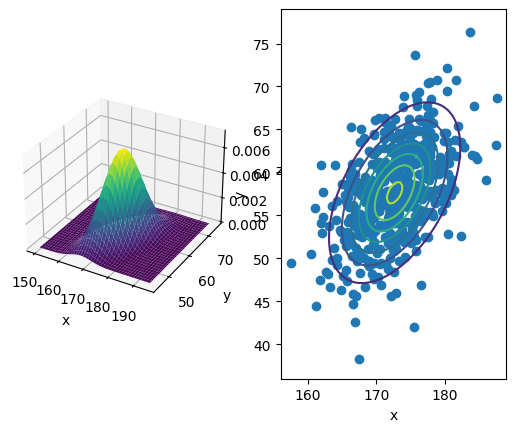

In [13]:
fig = plt.figure()

ax1 = fig.add_subplot(1, 2, 1, projection='3d')
ax1.set_xlabel('x')
ax1.set_ylabel('y')
ax1.set_zlabel('z')
ax1.plot_surface(X, Y, Z, cmap='viridis')

ax2 = fig.add_subplot(1, 2, 2)
ax2.scatter(small_xs[:, 0], small_xs[:, 1])
ax2.set_xlabel('x')
ax2.set_ylabel('y')
ax2.set_xlim(156, 189)
ax2.set_ylim(36, 79)
ax2.contour(X, Y, Z)

plt.show()